In [1]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
datset_path = "C:/Users/ASUS TUF GAMING A15/Desktop/erick/cico/5to Semestre/IA/Ochoa Paz Erick - SIS420/Primer parcial/weather_10000.xlsx"
df = pd.read_excel(datset_path)
df.head()

,Humidity (%),Wind Speed (m/s),Pressure (hPa),Solar Radiation (W/m²),Temperature (°C)
0,49.963210,3.736408,1031.099882,510.515655,149.661287
1,96.057145,3.329121,992.915840,367.433963,163.286053
2,78.559515,1.761539,1004.264779,771.598820,176.907297
3,67.892679,6.072667,1026.429645,175.182761,142.531584
4,32.481491,4.766242,1013.746254,470.285133,136.475182


In [ ]:
# variables predictoras
X = df[["Humidity (%)", "Wind Speed (m/s)", "Pressure (hPa)", "Solar Radiation (W/m²)"]]
# variable objetivo
y = df["Temperature (°C)"]

# 3. División de los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

Entrenamiento: 8000 registros
Prueba: 2000 registros


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_norm_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_norm_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
print("X_train normalizado:")
display(X_train_norm_df.head())

print("X_test normalizado:")
display(X_test_norm_df.head())

X_train normalizado:


,Humidity (%),Wind Speed (m/s),Pressure (hPa),Solar Radiation (W/m²)
9254,0.965060,-1.228372,1.562923,-0.131008
1561,-0.890078,-0.860177,-1.131713,-1.557653
1670,-0.390623,-0.574062,-0.080309,-1.235502
6087,-0.997376,1.267594,1.060011,-1.683488
6669,-1.260285,-0.533248,-1.294791,-1.500142


X_test normalizado:


,Humidity (%),Wind Speed (m/s),Pressure (hPa),Solar Radiation (W/m²)
6252,-0.540530,-1.400651,1.631321,0.276417
4684,0.981357,0.986216,-1.062414,0.966007
1731,0.454605,-1.014799,1.702356,0.241626
4742,-1.589408,1.043178,-1.295144,-0.577255
4521,0.292076,1.511960,-0.506691,1.197334


In [32]:
# 7. Inicializar parámetros
n = X_train_intercept.shape[1]  # número de características
theta = np.zeros(n)

# Hipótesis: h = X * theta
def hypothesis(X, theta):
    return np.dot(X, theta)

# Costo: error cuadrático medio (MSE)
def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [33]:
# Descenso de gradiente
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = hypothesis(X, theta)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta = theta - alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0 or i == iterations - 1:
            print(f"Iteración {i}: Costo = {cost:.4f}")
    return theta, cost_history


Iteración 0: Costo = 11128.7254
Iteración 100: Costo = 1501.7898
Iteración 200: Costo = 212.1140
Iteración 300: Costo = 39.3373
Iteración 400: Costo = 16.1899
Iteración 500: Costo = 13.0887
Iteración 600: Costo = 12.6732
Iteración 700: Costo = 12.6175
Iteración 800: Costo = 12.6100
Iteración 900: Costo = 12.6090
Iteración 999: Costo = 12.6089


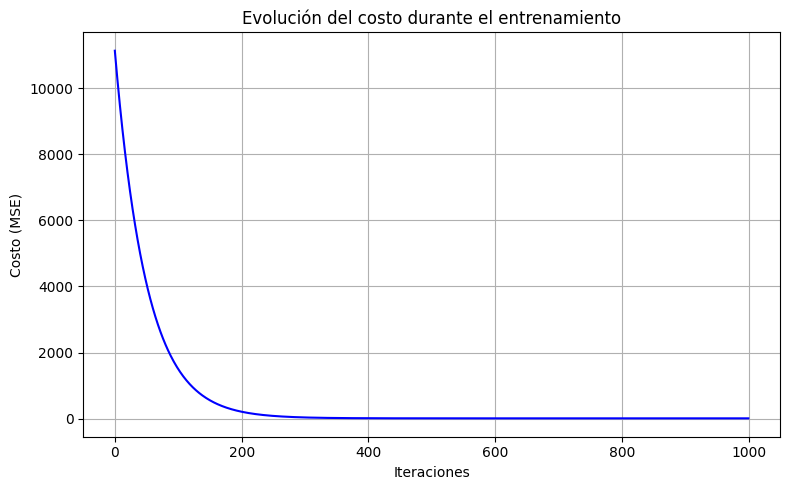

In [39]:
# 9. Entrenamiento del modelo
alpha = 0.01
iterations = 1000
theta_final, cost_history = gradient_descent(X_train_intercept, y_train, theta, alpha, iterations)

# 10. Predicciones en datos de prueba
y_pred = hypothesis(X_test_intercept, theta_final)

# 13. Gráfico del costo a lo largo de las iteraciones
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Evolución del costo durante el entrenamiento")
plt.grid(True)
plt.tight_layout()
plt.show()




Evaluación del modelo:
Error cuadrático medio (MSE): 24.3950
Coeficiente de determinación R²: 0.9189


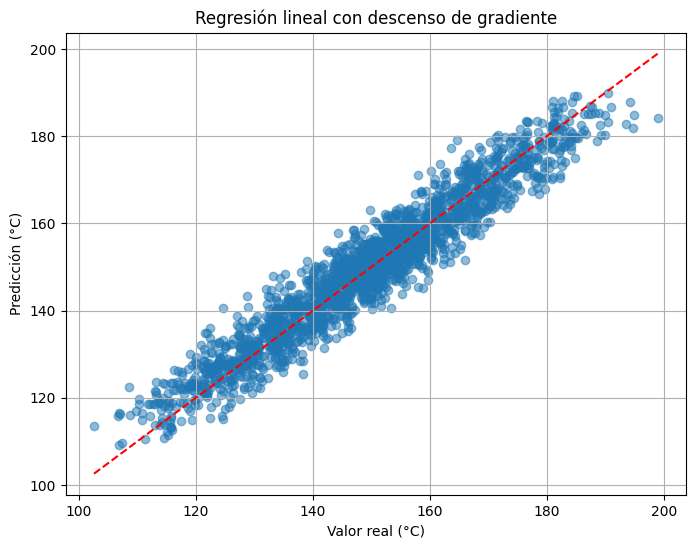

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación R²: {r2:.4f}")

# 12. Gráfico: predicción vs. valor real
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real (°C)")
plt.ylabel("Predicción (°C)")
plt.title("Regresión lineal con descenso de gradiente")
plt.grid(True)
plt.show()